In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('./data/Alpha_bank.csv')

In [5]:
dataEncoded = pd.get_dummies(data,columns = ['Job'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Marital_Status'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Education'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Default_Credit'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Housing_Loan'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Personal_Loan'], drop_first=True)
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Subscribed'], drop_first=True)


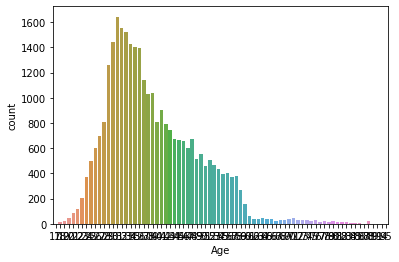

In [11]:
sns.countplot('Age', data=data)

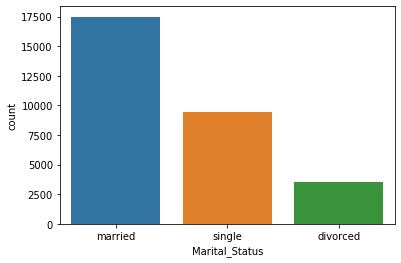

In [12]:
sns.countplot('Marital_Status', data=data)

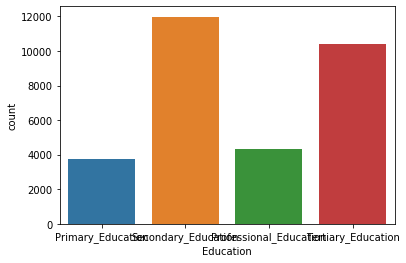

In [13]:
sns.countplot('Education', data=data)


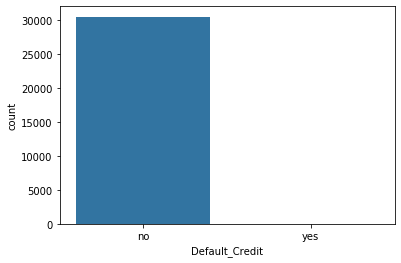

In [15]:
sns.countplot('Default_Credit', data=data)


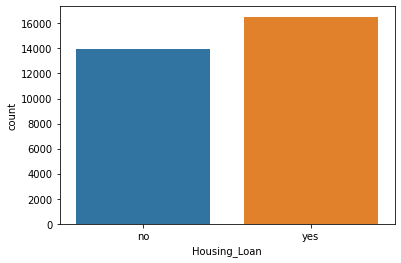

In [16]:
sns.countplot('Housing_Loan', data=data)


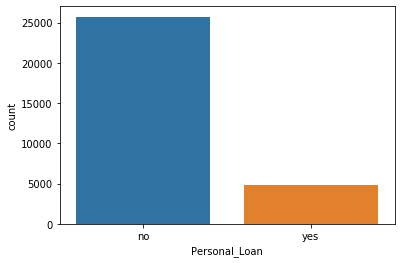

In [17]:
sns.countplot('Personal_Loan', data=data)


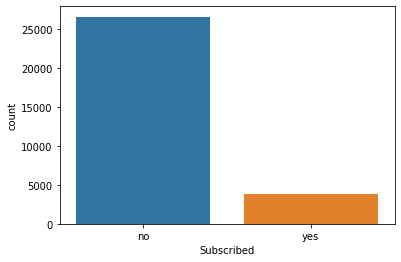

In [18]:
sns.countplot('Subscribed', data=data)

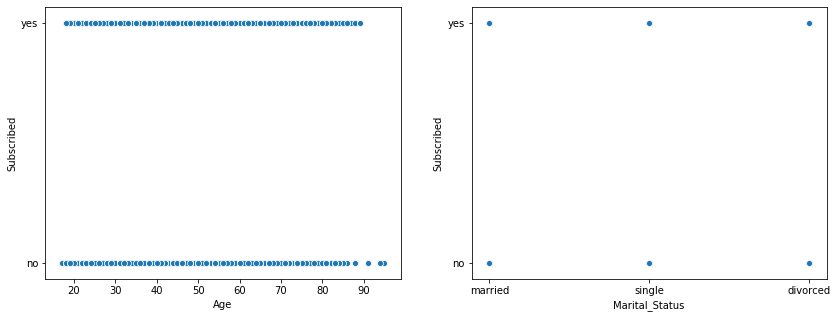

In [21]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.scatterplot('Age', 'Subscribed', data=data)
plt.subplot(122)
#sns.scatterplot('Job', 'Subscribed', data=data)# not a good one
sns.scatterplot('Marital_Status', 'Subscribed', data=data)


In [22]:
x = data['Age'].values.reshape(-1, 1)
y = data['Subscribed']

lr = LogisticRegression(solver='lbfgs')

lr.fit(x, y)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

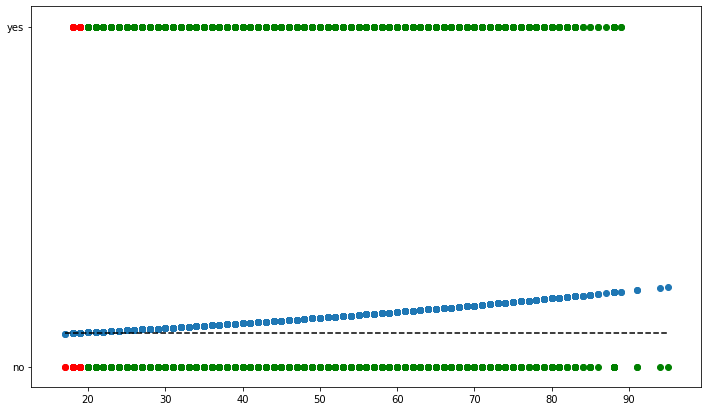

In [24]:
prob = lr.predict_proba(x)[:, 1]

# changing threshold will change which samples are classified 1 (Purchased) and which are classified 0 (Not Purchased)
th = 0.1
plt.figure(figsize=(12, 7))
plt.scatter(x[prob < th], y[prob < th], c='red', )
plt.scatter(x[prob >= th], y[prob >= th], c='green')
plt.scatter(x, lr.predict_proba(x)[:, 1])
plt.hlines(th, min(x), max(x), linestyles='dashed')